In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
items = pd.read_parquet('../data/fixed/items.parquet')
reviews = pd.read_parquet('../data/fixed/reviews.parquet')
games = pd.read_parquet('../data/fixed/games.parquet')

before need to create a matrix with dummy values for the genres in games so then we can analyze the data

In [24]:
games['genres'] = games['genres'].apply(lambda x: ', '.join(x))

In [26]:
dummies = games['genres'].str.get_dummies(sep=',')

In [27]:
dummies.head()

,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,Free to Play,Indie,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
games = pd.concat([games, dummies], axis=1)


In [30]:
games.drop(columns='genres', axis=1, inplace=True)

In [35]:
games.head()

,title,tags,price,id,year,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,Lost Summoner Kitty,"[Strategy, Action, Indie, Casual, Simulation]",5,761140,2018,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Ironbound,"[Free to Play, Strategy, Indie, RPG, Card Game...",0,643980,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Real Pool 3D - Poolians,"[Free to Play, Simulation, Sports, Casual, Ind...",0,670290,2017,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,弹炸人2222,"[Action, Adventure, Casual]",1,767400,2017,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Battle Royale Trainer,"[Action, Adventure, Simulation, FPS, Shooter, ...",4,772540,2018,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
games['id'] = games['id'].astype(str)
games['id'] = games['id'].str.replace('.0', '')

In [36]:
games.to_parquet('../data/fixed/games_final.parquet', engine='pyarrow')

correlation analysis between price and the genre of the product

In [41]:
genre = games.iloc[:, 4:]
price = games['price']
matriz = pd.concat([genre, price], axis=1)
corr = matriz.corr()
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr.style.background_gradient(cmap='rocket')

,year,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,Indie,Massively Multiplayer,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,Indie,Massively Multiplayer,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,price
year,1.000000,-0.002782,0.004830,0.000316,0.001130,0.012171,0.002393,0.041742,0.001391,0.008527,0.041315,0.006137,0.001807,0.009460,0.001751,0.006899,0.001187,0.008404,0.008682,0.002815,0.001684,0.002468,0.001047,-0.006236,-0.000721,0.002225,0.000791,0.021289,0.003793,-0.000137,0.000984,0.004408,0.010176,0.001865,-0.000515,-0.006487,-0.003188,-0.007742,0.000362,-0.001752,-0.028939,0.001495,0.001814,-0.000836,-0.001944
Action,-0.002782,1.000000,-0.004043,-0.000121,-0.000181,-0.004063,-0.000697,-0.002349,-0.000537,-0.002402,0.004792,-0.001996,-0.000501,-0.004562,-0.001526,-0.004593,-0.000553,0.014955,0.003360,-0.000952,-0.000589,-0.000977,-0.000160,-0.008199,-0.004290,-0.000809,-0.000553,-0.004307,-0.001096,-0.000121,-0.000409,0.024114,-0.003673,-0.000422,-0.000171,-0.001588,-0.001293,-0.002682,-0.000276,0.072931,0.015356,-0.000576,-0.000276,-0.000171,-0.004324
Adventure,0.004830,-0.004043,1.000000,-0.004669,-0.007004,0.075003,-0.026984,0.061418,-0.020777,0.012522,0.213517,0.029769,-0.019414,0.089316,0.005659,-0.073069,-0.021426,-0.041505,-0.078504,-0.036846,-0.022790,-0.037812,-0.006177,0.492962,-0.166113,-0.031329,-0.021426,-0.166771,-0.042455,-0.004669,-0.015845,-0.053825,-0.142217,-0.016354,-0.006603,-0.060796,-0.050080,-0.103862,-0.010701,-0.018401,-0.080502,-0.022304,-0.010701,-0.006603,-0.028181
Animation & Modeling,0.000316,-0.000121,-0.004669,1.000000,0.499904,-0.004692,0.086114,-0.002713,0.055716,-0.002773,-0.004386,-0.002305,0.059691,-0.005268,-0.001763,-0.005303,0.053999,-0.002455,-0.005927,0.094763,0.050708,0.030024,0.188834,-0.003424,-0.004954,-0.000934,-0.000639,0.011512,-0.001266,-0.000139,-0.000473,-0.001605,-0.004241,-0.000488,-0.000197,-0.001833,-0.001494,-0.003098,-0.000319,-0.000549,-0.002401,-0.000665,-0.000319,-0.000197,-0.000120
Audio Production,0.001130,-0.000181,-0.007004,0.499904,1.000000,-0.007038,0.143669,0.004939,0.036631,-0.004161,-0.015509,-0.003458,0.039315,-0.007902,-0.002644,-0.002696,0.108327,-0.003683,-0.008891,0.147484,0.204548,0.060618,0.125747,-0.014202,-0.007432,0.123580,-0.000959,0.003530,-0.001899,-0.000209,-0.000709,-0.002408,-0.000183,-0.000732,-0.000295,-0.002750,-0.002241,-0.004647,-0.000479,-0.000823,-0.003602,-0.000998,-0.000479,-0.000295,0.014004
Casual,0.012171,-0.004063,0.075003,-0.004692,-0.007038,1.000000,-0.027116,0.016320,-0.020879,0.047194,0.275278,-0.007628,-0.019509,-0.017897,0.046077,-0.000022,-0.021531,0.027085,-0.020507,-0.037027,-0.022902,-0.037997,-0.006207,0.129416,0.317364,-0.031483,-0.021531,-0.167588,-0.042663,-0.004692,-0.015923,-0.054089,-0.132085,-0.016435,-0.006636,-0.059763,-0.050326,-0.104371,-0.010754,-0.016306,-0.070518,-0.022413,-0.010754,-0.006636,-0.067255
Design & Illustration,0.002393,-0.000697,-0.026984,0.086114,0.143669,-0.027116,1.000000,0.000762,0.544764,-0.016029,-0.058713,-0.013322,0.132837,-0.030444,-0.010186,-0.030650,0.461651,-0.014189,-0.034254,0.471296,0.228299,0.155922,0.031789,-0.053664,-0.028631,0.835225,0.015301,-0.028744,-0.007317,-0.000805,-0.002731,-0.009277,-0.024512,-0.002819,-0.001138,-0.010594,-0.008632,-0.017901,-0.001844,-0.003171,-0.013875,-0.003844,-0.001844,-0.001138,0.211736
Early Access,0.041742,-0.002349,0.061418,-0.002713,0.004939,0.016320,0.000762,1.000000,-0.002938,0.001798,0.116689,0.042359,-0.011279,0.056697,0.046404,0.055287,-0.003591,0.018523,0.044710,0.001041,-0.007687,-0.020285,-0.003589,0.087952,-0.026385,0.000032,-0.009496,-0.045668,-0.014146,-0.002713,-0.001231,0.000955,0.032

In [54]:
items['item_id'] = items['item_id'].astype(str)
items.dtypes

user_id             object
item_id             object
playtime_forever     int64
dtype: object

most played games

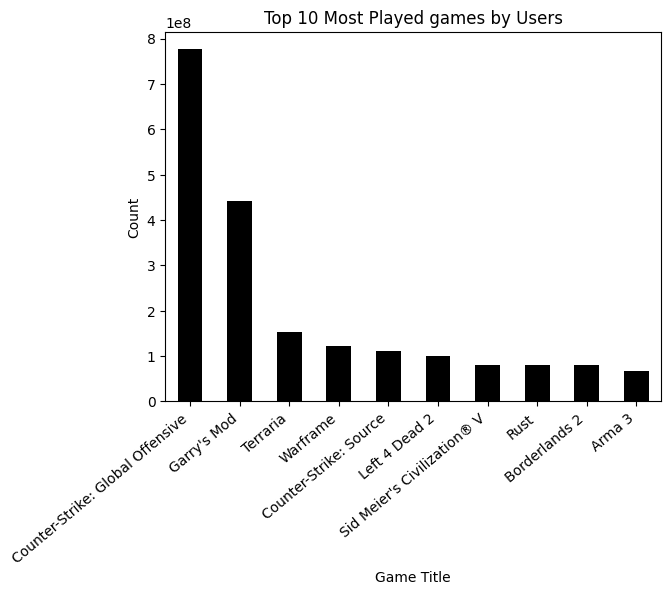

In [56]:

# Join the tables on 'id' and 'item_id'
merged_data = pd.merge(games, items, left_on='id', right_on='item_id', how='inner')


cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=0.95, reverse=True, as_cmap=True)


ax = merged_data.groupby(["title"])['playtime_forever'].sum().sort_values(ascending=False)\
    .head(10)\
    .plot(kind='bar', title='Top 10 Most Played games by Users', colormap=cmap)


ax.set_xlabel('Game Title')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

# Show the plot
plt.show()


sentiment analysis

Text(0.5, 1.0, 'Sentiment Count')

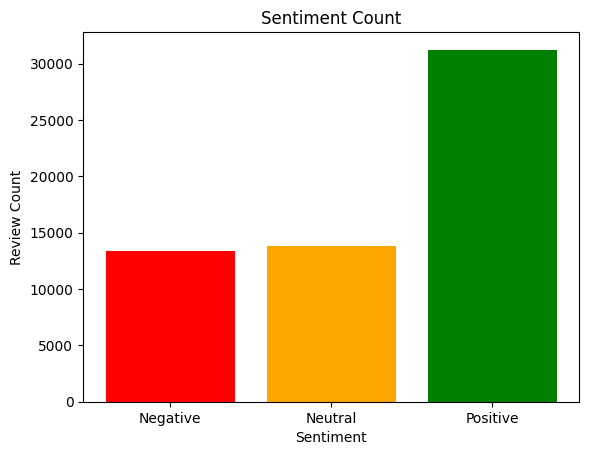

In [60]:
colors = ['green', 'orange', 'red']

df_rev_sentimiento = reviews.copy()

# Count the sentiment values
sentiment_counts = df_rev_sentimiento['sentiment_analysis'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)

plt.xlabel('Sentiment')
plt.ylabel('Review Count')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.title('Sentiment Count')